In [138]:
import pandas as pd
import numpy as np
import glob as glob
from collections import Counter
from tabulate import tabulate
import matplotlib.pyplot as plt

In [139]:
df_pre_test = pd.read_csv('datasets/pre_test_combined_with_label.csv')
df_test = pd.read_csv('datasets/dse_exam_cleaned_with_label.csv')

df_pre_test = df_pre_test.drop(['Unnamed: 0'], axis=1) # drop unnamed column
df_test = df_test.drop(['Unnamed: 0'], axis=1) # drop unnamed column

### *Note: There is no duplicated data in Pre-test*

In [140]:
# Clean Pre-test Dataset
df_pre_test['name'] = df_pre_test['First name'] +' '+ df_pre_test['Surname']
df_pre_test['name'] = df_pre_test['name'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_pre_test['name'] = df_pre_test['name'].str.replace('\u200b', '')

df_pre_test = df_pre_test.sort_values(by='name')
df_pre_test


,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.25,Q. 2 /1.25,...,Q. 73 /1.25,Q. 74 /1.25,Q. 75 /1.25,Q. 76 /1.25,Q. 77 /1.25,Q. 78 /1.25,Q. 79 /1.25,Q. 80 /1.25,label,name
2168,VANNA,AM,amvanna77@gmail.com,Finished,29 July 2022 8:52 AM,29 July 2022 9:50 AM,58 mins 18 secs,42.52,1.25,0.25,...,1.25,0.00,1.25,0.50,0.42,0.42,0.00,0.00,Failed,AM VANNA
2890,VEASNA,AM,dse_22_4607@idg.edu.kh,Finished,12 August 2022 3:57 PM,12 August 2022 5:15 PM,1 hour 18 mins,48.00,1.25,1.25,...,0.75,0.42,1.25,0.83,0.63,0.00,0.00,1.25,Failed,AM VEASNA
846,SAMSUPHIN,AN,dse_22_4193@idg.com,Finished,2 August 2022 10:10 AM,2 August 2022 11:18 AM,1 hour 8 mins,40.71,1.25,1.25,...,0.75,1.25,1.25,0.83,1.25,0.00,0.00,0.00,Failed,AN SAMSUPHIN
873,KIMHENG,ANG,lmhong7@gmail.com,Finished,2 August 2022 10:23 AM,2 August 2022 11:43 AM,1 hour 20 mins,40.08,1.25,1.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Failed,ANG KIMHENG
2448,MENGHUOTH,ANG,angmenghout11@gmail.com,Finished,15 August 2022 3:06 PM,15 August 2022 4:26 PM,1 hour 20 mins,76.42,1.25,0.00,...,1.25,1.25,0.63,1.25,0.83,1.25,0.00,1.25,Passed,ANG MENGHUOTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,ដាលីស,ឯក,edalispg2n78@era.gov.kh,Finished,22 July 2022 8:11 PM,22 July 2022 8:59 PM,47 mins 20 secs,34.04,0.75,0.00,...,0.83,0.00,1.25,0.50,0.42,0.00,1.25,0.00,Failed,ឯក ដាលីស
1574,ផាណិត,ឯក,012622908@gmail.com,Finished,24 May 2023 10:04 AM,24 May 2023 11:08 AM,1 hour 4 mins,41.69,1.25,0.83,...,1.25,1.25,1.25,0.50,0.83,0.83,1.25,0.00,Failed,ឯក ផាណិត
273,ផៅសិរីសិរីបុត្រ,ឯកសារន្ត,epserybothh12n34@era.gov.kh,Finished,22 July 2022 1:40 PM,22 July 2022 2:41 PM,1 hour 1 min,60.75,1.25,1.25,...,1.25,0.00,1.25,1.00,1.25,1.25,0.00,1.25,Passed,ឯកសារន្ត ផៅសិរីសិរីបុត្រ
95,វណ្ណវ៉ារីណែត,ឯម,evanvarinethpg1n36@era.gov.kh,Finished,22 July 2022 8:33 AM,22 July 2022 9:51 AM,1 hour 18 mins,23.17,0.00,1.25,...,0.42,0.00,1.25,0.00,0.00,0.00,0.00,0.00,Failed,ឯម វណ្ណវ៉ារីណែត


In [141]:
# Clean Test Dataset
df_test['name'] = df_test['First name'] + ' ' +df_test['Surname']
df_test['name'] = df_test['name'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_test['name'] = df_test['name'].str.replace('\u200b', '')

df_test = df_test.sort_values(by='name')
df_test

,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.00,Q. 2 /1.00,...,Q. 93 /1.00,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00,label,name
1972,Chantra,BE,chantra.be@niptict.edu.kh,Finished,2022-03-05 10:19:00,2022-03-05 11:39:00,1 hour 20 mins,75.90,1.0,0.0,...,1.0,0.0,1.00,1.00,0.5,0.0,1.0,1.00,Passed,BE Chantra
1959,PISAL,CHANTY,pisal.chanty@cadt.edu.kh,Finished,2022-03-04 18:08:00,2022-03-04 19:31:00,1 hour 23 mins,89.48,1.0,1.0,...,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.00,Passed,CHANTY PISAL
1923,SOCHEAT,CHEA,socheat.chea@cadt.edu.kh,Finished,2022-02-16 15:00:00,2022-02-16 16:54:00,1 hour 53 mins,85.13,1.0,0.0,...,1.0,1.0,1.00,1.00,1.0,1.0,0.0,1.00,Passed,CHEA SOCHEAT
1970,Mara,Chea,cheamara.kh@gmail.com,Finished,2022-03-05 10:14:00,2022-03-05 11:15:00,1 hour,47.94,0.0,0.0,...,1.0,0.0,1.00,0.00,1.0,0.0,0.0,1.00,Failed,Chea Mara
1920,Rithya,Cheng,rithya.cheng@niptict.edu.kh,Finished,2022-02-16 12:14:00,2022-02-16 13:30:00,1 hour 16 mins,78.88,1.0,1.0,...,0.0,1.0,0.00,1.00,1.0,1.0,1.0,0.00,Passed,Cheng Rithya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,ផៅសិរីសិរីបុត្រ,ឯកសារន្ត,D220558@DSEERA22.com,Finished,2022-12-30 15:12:00,2022-12-30 17:06:00,1 hour 54 mins,81.30,0.0,1.0,...,1.0,1.0,0.00,1.00,0.0,1.0,1.0,1.00,Passed,ឯកសារន្ត ផៅសិរីសិរីបុត្រ
442,វណ្ណវ៉ារីណែត,ឯម,D220717@DSEERA22.com,Finished,2022-12-28 10:27:00,2022-12-28 12:20:00,1 hour 52 mins,35.76,1.0,0.0,...,0.0,0.0,0.17,0.17,0.0,0.0,0.0,0.17,Failed,ឯម វណ្ណវ៉ារីណែត
890,ហ្វ៊ីណង់,ឯម,dp231578@DSEPROVINCE23.com,Finished,2023-03-15 09:44:00,2023-03-15 11:19:00,1 hour 34 mins,38.88,0.0,1.0,...,1.0,1.0,0.00,0.00,1.0,0.0,0.0,0.00,Failed,ឯម ហ្វ៊ីណង់
1086,មុន្នីស័ក,ឱ,dp231753@DSEPROVINCE23.com,Finished,2023-03-22 13:13:00,2023-03-22 15:12:00,1 hour 59 mins,65.95,1.0,1.0,...,0.0,1.0,0.00,1.00,1.0,0.0,0.0,1.00,Passed,ឱ មុន្នីស័ក


In [142]:
# Find Duplicated Rows
duplicated_rows = df_test[df_test.duplicated(keep=False)]
print("Double Duplicated Rows :", len(duplicated_rows))
print("Unique Duplicated :", len(duplicated_rows['name'].unique()))


Double Duplicated Rows : 0
Unique Duplicated : 0


In [143]:
# duplicated_rows

In [144]:
duplicated_rows = duplicated_rows[duplicated_rows.duplicated(keep='first')]
duplicated_rows.to_csv('duplicated_data.csv') # Save duplicated data to a csv file

In [145]:
# Remove duplicated rows
df_no_duplicates = df_test.drop_duplicates(keep='first')
print("DataFrame without Duplicates:")

df_test = df_no_duplicates
df_test

DataFrame without Duplicates:


,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.00,Q. 2 /1.00,...,Q. 93 /1.00,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00,label,name
1972,Chantra,BE,chantra.be@niptict.edu.kh,Finished,2022-03-05 10:19:00,2022-03-05 11:39:00,1 hour 20 mins,75.90,1.0,0.0,...,1.0,0.0,1.00,1.00,0.5,0.0,1.0,1.00,Passed,BE Chantra
1959,PISAL,CHANTY,pisal.chanty@cadt.edu.kh,Finished,2022-03-04 18:08:00,2022-03-04 19:31:00,1 hour 23 mins,89.48,1.0,1.0,...,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.00,Passed,CHANTY PISAL
1923,SOCHEAT,CHEA,socheat.chea@cadt.edu.kh,Finished,2022-02-16 15:00:00,2022-02-16 16:54:00,1 hour 53 mins,85.13,1.0,0.0,...,1.0,1.0,1.00,1.00,1.0,1.0,0.0,1.00,Passed,CHEA SOCHEAT
1970,Mara,Chea,cheamara.kh@gmail.com,Finished,2022-03-05 10:14:00,2022-03-05 11:15:00,1 hour,47.94,0.0,0.0,...,1.0,0.0,1.00,0.00,1.0,0.0,0.0,1.00,Failed,Chea Mara
1920,Rithya,Cheng,rithya.cheng@niptict.edu.kh,Finished,2022-02-16 12:14:00,2022-02-16 13:30:00,1 hour 16 mins,78.88,1.0,1.0,...,0.0,1.0,0.00,1.00,1.0,1.0,1.0,0.00,Passed,Cheng Rithya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,ផៅសិរីសិរីបុត្រ,ឯកសារន្ត,D220558@DSEERA22.com,Finished,2022-12-30 15:12:00,2022-12-30 17:06:00,1 hour 54 mins,81.30,0.0,1.0,...,1.0,1.0,0.00,1.00,0.0,1.0,1.0,1.00,Passed,ឯកសារន្ត ផៅសិរីសិរីបុត្រ
442,វណ្ណវ៉ារីណែត,ឯម,D220717@DSEERA22.com,Finished,2022-12-28 10:27:00,2022-12-28 12:20:00,1 hour 52 mins,35.76,1.0,0.0,...,0.0,0.0,0.17,0.17,0.0,0.0,0.0,0.17,Failed,ឯម វណ្ណវ៉ារីណែត
890,ហ្វ៊ីណង់,ឯម,dp231578@DSEPROVINCE23.com,Finished,2023-03-15 09:44:00,2023-03-15 11:19:00,1 hour 34 mins,38.88,0.0,1.0,...,1.0,1.0,0.00,0.00,1.0,0.0,0.0,0.00,Failed,ឯម ហ្វ៊ីណង់
1086,មុន្នីស័ក,ឱ,dp231753@DSEPROVINCE23.com,Finished,2023-03-22 13:13:00,2023-03-22 15:12:00,1 hour 59 mins,65.95,1.0,1.0,...,0.0,1.0,0.00,1.00,1.0,0.0,0.0,1.00,Passed,ឱ មុន្នីស័ក


In [146]:
pre_test_name = np.array(df_pre_test['name'])
print("Amount of Pre-text Examinees:", pre_test_name.size)

Amount of Pre-text Examinees: 3064


In [147]:
test_name = np.array(df_test['name'])
test_name.size
print("Amount of Certificated Exam Examinees:", test_name.size)

Amount of Certificated Exam Examinees: 2068


In [148]:
mapped_name = []
for name in pre_test_name:
    if(name in test_name):
        mapped_name.append(name)

In [149]:
mapped_name = np.array(mapped_name)
mapped_name.size


691

In [150]:
df_test = df_test[df_test['name'].isin(mapped_name)]
# df_test
df_test['pre_test_score'] = None
df_test

/var/folders/dt/90w7dnxx5xzfd7px48yrrpt00000gn/T/ipykernel_87548/3691151319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pre_test_score'] = None


,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.00,Q. 2 /1.00,...,Q. 94 /1.00,Q. 95 /1.00,Q. 96 /1.00,Q. 97 /1.00,Q. 98 /1.00,Q. 99 /1.00,Q. 100 /1.00,label,name,pre_test_score
1020,TOU,NHET,nhettou.math@gmail.com,Finished,2023-03-17 14:14:00,2023-03-17 16:14:00,1 hour 59 mins,57.71,1.0,0.0,...,0.0,0.00,1.00,0.0,0.0,1.0,1.00,Failed,NHET TOU,None
825,ចន្នី,កង,dp23410@DSEPROVINCE23.com,Finished,2023-08-03 08:02:00,2023-08-03 10:02:00,2 hours,48.18,1.0,0.0,...,0.0,0.00,0.33,0.0,1.0,1.0,0.00,Failed,កង ចន្នី,None
229,សុផាន់ណា,កាំង,D220129@DSEERA22.com,Finished,2022-12-23 08:20:00,2022-12-23 10:15:00,1 hour 55 mins,54.32,0.0,1.0,...,0.0,0.67,1.00,0.0,0.0,1.0,0.00,Failed,កាំង សុផាន់ណា,None
375,តុលា,កឹម,D220570@DSEERA22.com,Finished,2022-12-28 08:13:00,2022-12-28 09:59:00,1 hour 45 mins,62.52,0.0,0.0,...,0.0,1.00,0.00,0.0,1.0,1.0,1.00,Passed,កឹម តុលា,None
820,សៀករតនៈ,កឹម,dp23411@DSEPROVINCE23.com,Finished,2023-08-03 08:00:00,2023-08-03 10:00:00,2 hours,72.72,1.0,1.0,...,0.0,1.00,1.00,0.0,0.0,0.0,0.00,Passed,កឹម សៀករតនៈ,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,សុធា,អ៊ុំ,dp23467@DSEPROVINCE23.com,Finished,2023-08-03 13:56:00,2023-08-03 15:52:00,1 hour 56 mins,74.66,1.0,1.0,...,1.0,1.00,0.67,0.0,1.0,1.0,0.00,Passed,អ៊ុំ សុធា,None
443,សារុន,អ៊ួង,D220729@DSEERA22.com,Finished,2022-12-28 10:28:00,2022-12-28 12:23:00,1 hour 55 mins,34.54,1.0,1.0,...,0.5,1.00,1.00,0.0,0.0,0.0,0.00,Failed,អ៊ួង សារុន,None
808,ដាលីស,ឯក,D220357@DSEERA22.com,Finished,2022-12-30 15:21:00,2022-12-30 17:14:00,1 hour 52 mins,45.52,1.0,1.0,...,1.0,0.17,1.00,1.0,0.0,0.0,1.00,Failed,ឯក ដាលីស,None
760,ផៅសិរីសិរីបុត្រ,ឯកសារន្ត,D220558@DSEERA22.com,Finished,2022-12-30 15:12:00,2022-12-30 17:06:00,1 hour 54 mins,81.30,0.0,1.0,...,1.0,0.00,1.00,0.0,1.0,1.0,1.00,Passed,ឯកសារន្ត ផៅសិរីសិរីបុត្រ,None


In [151]:
for name in mapped_name:
    pre_test_score = df_pre_test[df_pre_test['name'] == name]['Grade/100.00'].values[0]
    # print(name, pre_test_score)
    df_test.loc[df_test['name']==name, 'pre_test_score'] = pre_test_score
    # break

In [152]:
df_test = df_test[['name', 'Email address','pre_test_score', 'Grade/100.00']]
df_test['diff'] = df_test['Grade/100.00'] - df_test['pre_test_score']
df_test

/var/folders/dt/90w7dnxx5xzfd7px48yrrpt00000gn/T/ipykernel_87548/2180426753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['diff'] = df_test['Grade/100.00'] - df_test['pre_test_score']


,name,Email address,pre_test_score,Grade/100.00,diff
1020,NHET TOU,nhettou.math@gmail.com,53.65,57.71,4.06
825,កង ចន្នី,dp23410@DSEPROVINCE23.com,34.94,48.18,13.24
229,កាំង សុផាន់ណា,D220129@DSEERA22.com,40.75,54.32,13.57
375,កឹម តុលា,D220570@DSEERA22.com,20.52,62.52,42.0
820,កឹម សៀករតនៈ,dp23411@DSEPROVINCE23.com,39.63,72.72,33.09
...,...,...,...,...,...
866,អ៊ុំ សុធា,dp23467@DSEPROVINCE23.com,48.42,74.66,26.24
443,អ៊ួង សារុន,D220729@DSEERA22.com,11.25,34.54,23.29
808,ឯក ដាលីស,D220357@DSEERA22.com,34.04,45.52,11.48
760,ឯកសារន្ត ផៅសិរីសិរីបុត្រ,D220558@DSEERA22.com,60.75,81.30,20.55


## Check Improvement ALL

In [153]:
df_test.loc[df_test['diff'] >= 0, 'improvement'] = True
df_test.loc[df_test['diff'] < 0, 'improvement'] = False
df_test

# df_test.to_excel('./course_prep_dataset/improvement_list_mapped.xlsx', index=False)

/var/folders/dt/90w7dnxx5xzfd7px48yrrpt00000gn/T/ipykernel_87548/2083337847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[df_test['diff'] >= 0, 'improvement'] = True


,name,Email address,pre_test_score,Grade/100.00,diff,improvement
1020,NHET TOU,nhettou.math@gmail.com,53.65,57.71,4.06,True
825,កង ចន្នី,dp23410@DSEPROVINCE23.com,34.94,48.18,13.24,True
229,កាំង សុផាន់ណា,D220129@DSEERA22.com,40.75,54.32,13.57,True
375,កឹម តុលា,D220570@DSEERA22.com,20.52,62.52,42.0,True
820,កឹម សៀករតនៈ,dp23411@DSEPROVINCE23.com,39.63,72.72,33.09,True
...,...,...,...,...,...,...
866,អ៊ុំ សុធា,dp23467@DSEPROVINCE23.com,48.42,74.66,26.24,True
443,អ៊ួង សារុន,D220729@DSEERA22.com,11.25,34.54,23.29,True
808,ឯក ដាលីស,D220357@DSEERA22.com,34.04,45.52,11.48,True
760,ឯកសារន្ត ផៅសិរីសិរីបុត្រ,D220558@DSEERA22.com,60.75,81.30,20.55,True


In [154]:
print("Average Improvement Score : ", df_test['diff'].mean())

improvement = Counter(np.array(df_test['improvement']))
improvement

Average Improvement Score :  16.464519368723085


Counter({True: 633, False: 64})

In [155]:
# Calculate the total number of observations
total_observations = sum(improvement.values())

# Calculate the probability of each outcome
probabilities = {outcome: count / total_observations for outcome, count in improvement.items()}

# Display the result
for outcome, probability in probabilities.items():
    print(f"Outcome: {outcome}, Probability: {probability:.2%}")

Outcome: True, Probability: 90.82%
Outcome: False, Probability: 9.18%


In [156]:
def display_improvement(sizes):
    plt.figure(figsize=(6, 6))

    # Sample data
    labels = ['Improvement Rate', 'No Improvement Rate']
    # sizes = [95.81, 4.19]
    sizes = sizes

    # Create a pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)

    # Draw a circle at the center of the pie to make it look like a donut chart (optional)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.title("Improvement Rate of Examinees Before and After Examination")
    # plt.legend()
    plt.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))


    # Display the pie chart
    return plt.show()

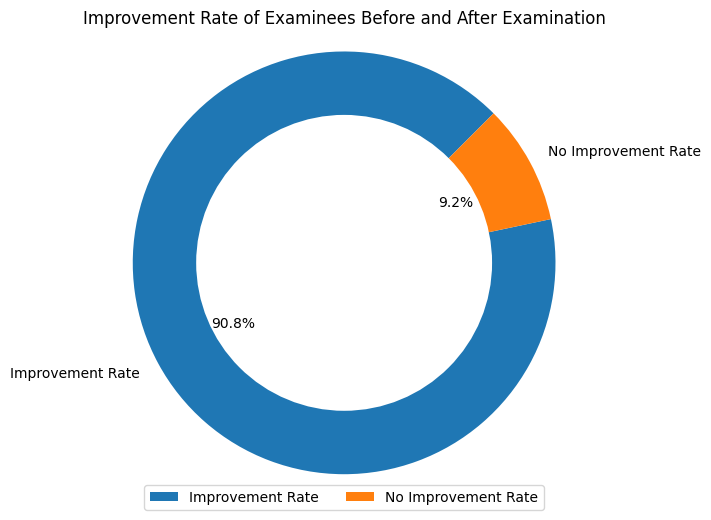

In [157]:
display_improvement([90.82, 9.18])

## Check Improvement PASSED Only

In [158]:
df_test_passed = df_test[df_test['Grade/100.00'] >= 60]
df_test_passed.loc[df_test_passed['diff'] >= 0, 'improvement'] = True
df_test_passed.loc[df_test_passed['diff'] < 0, 'improvement'] = False

improvement = Counter(np.array(df_test_passed['improvement']))
improvement

# Calculate the total number of observations
total_observations = sum(improvement.values())

# Calculate the probability of each outcome
probabilities = {outcome: count / total_observations for outcome, count in improvement.items()}

# Display the result
for outcome, probability in probabilities.items():
    print(f"Outcome: {outcome}, Probability: {probability:.2%}")

Outcome: True, Probability: 95.81%
Outcome: False, Probability: 4.19%


In [159]:
print("Average Improvement Score : ", df_test_passed['diff'].mean())

improvement = Counter(np.array(df_test_passed['improvement']))
improvement

Average Improvement Score :  19.177290322580642


Counter({True: 297, False: 13})

In [160]:
df_test_passed

,name,Email address,pre_test_score,Grade/100.00,diff,improvement
375,កឹម តុលា,D220570@DSEERA22.com,20.52,62.52,42.0,True
820,កឹម សៀករតនៈ,dp23411@DSEPROVINCE23.com,39.63,72.72,33.09,True
205,កុយ ថារី,D220137@DSEERA22.com,38.46,60.35,21.89,True
586,កេត មេសា,D220368@DSEERA22.com,52.42,68.73,16.31,True
569,កែវ ច័ន្ទរ៉ានិច,D220369@DSEERA22.com,58.42,74.92,16.5,True
...,...,...,...,...,...,...
781,អ៊ុន សាវន,D220351@DSEERA22.com,41.83,60.17,18.34,True
799,អ៊ុយ សុភ័ក្ដ្រ,D220365@DSEERA22.com,48.71,64.89,16.18,True
783,អ៊ុំ ពុទ្ធាវី,D220337@DSEERA22.com,43.06,66.53,23.47,True
866,អ៊ុំ សុធា,dp23467@DSEPROVINCE23.com,48.42,74.66,26.24,True


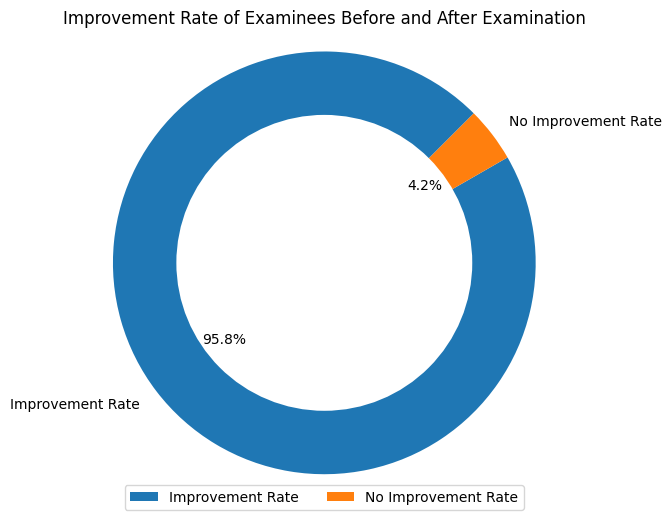

In [161]:
display_improvement([95.81, 4.19])

In [162]:
# plt.figure(figsize=(8, 6))

# # Sample data
# labels = ['Improvement', 'No Improvement']
# sizes = [95.81, 4.19]

# # Create a pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)

# # Draw a circle at the center of the pie to make it look like a donut chart (optional)
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# # Equal aspect ratio ensures that pie is drawn as a circle
# plt.axis('equal')
# plt.title("Improvement Rate of Examinees Before and After Examination")
# plt.legend()

# # Display the pie chart
# plt.show()


In [163]:
print("Average Improvement Score : ", df_test_passed['diff'].mean())

Average Improvement Score :  19.177290322580642


In [164]:
df_test_passed

,name,Email address,pre_test_score,Grade/100.00,diff,improvement
375,កឹម តុលា,D220570@DSEERA22.com,20.52,62.52,42.0,True
820,កឹម សៀករតនៈ,dp23411@DSEPROVINCE23.com,39.63,72.72,33.09,True
205,កុយ ថារី,D220137@DSEERA22.com,38.46,60.35,21.89,True
586,កេត មេសា,D220368@DSEERA22.com,52.42,68.73,16.31,True
569,កែវ ច័ន្ទរ៉ានិច,D220369@DSEERA22.com,58.42,74.92,16.5,True
...,...,...,...,...,...,...
781,អ៊ុន សាវន,D220351@DSEERA22.com,41.83,60.17,18.34,True
799,អ៊ុយ សុភ័ក្ដ្រ,D220365@DSEERA22.com,48.71,64.89,16.18,True
783,អ៊ុំ ពុទ្ធាវី,D220337@DSEERA22.com,43.06,66.53,23.47,True
866,អ៊ុំ សុធា,dp23467@DSEPROVINCE23.com,48.42,74.66,26.24,True


## Check Improvement FAILED Only

In [165]:
df_test_failed = df_test[df_test['Grade/100.00'] < 60]
df_test_failed.loc[df_test_failed['diff'] >= 0, 'improvement'] = True
df_test_failed.loc[df_test_failed['diff'] < 0, 'improvement'] = False

improvement = Counter(np.array(df_test_failed['improvement']))
improvement

# Calculate the total number of observations
total_observations = sum(improvement.values())

# Calculate the probability of each outcome
probabilities = {outcome: count / total_observations for outcome, count in improvement.items()}

# Display the result
for outcome, probability in probabilities.items():
    print(f"Outcome: {outcome}, Probability: {probability:.2%}")

Outcome: True, Probability: 86.82%
Outcome: False, Probability: 13.18%


In [166]:
print("Average Improvement Score : ", df_test_failed['diff'].mean())

improvement = Counter(np.array(df_test_failed['improvement']))
improvement

Average Improvement Score :  14.29149870801034


Counter({True: 336, False: 51})

In [167]:
df_test_failed

,name,Email address,pre_test_score,Grade/100.00,diff,improvement
1020,NHET TOU,nhettou.math@gmail.com,53.65,57.71,4.06,True
825,កង ចន្នី,dp23410@DSEPROVINCE23.com,34.94,48.18,13.24,True
229,កាំង សុផាន់ណា,D220129@DSEERA22.com,40.75,54.32,13.57,True
364,កឺម វណ្ណហ្វីដែល,D220571@DSEERA22.com,0.0,52.83,52.83,True
1268,កុយ វិច្ឆានី,dp233002@DSEPROVINCE23.com,32.56,40.75,8.19,True
...,...,...,...,...,...,...
796,អ៊ុច សុភ័ក្ដ្រ,D220364@DSEERA22.com,33.71,52.96,19.25,True
432,អ៊ុយ ធីដែន,D220728@DSEERA22.com,26.81,42.10,15.29,True
443,អ៊ួង សារុន,D220729@DSEERA22.com,11.25,34.54,23.29,True
808,ឯក ដាលីស,D220357@DSEERA22.com,34.04,45.52,11.48,True


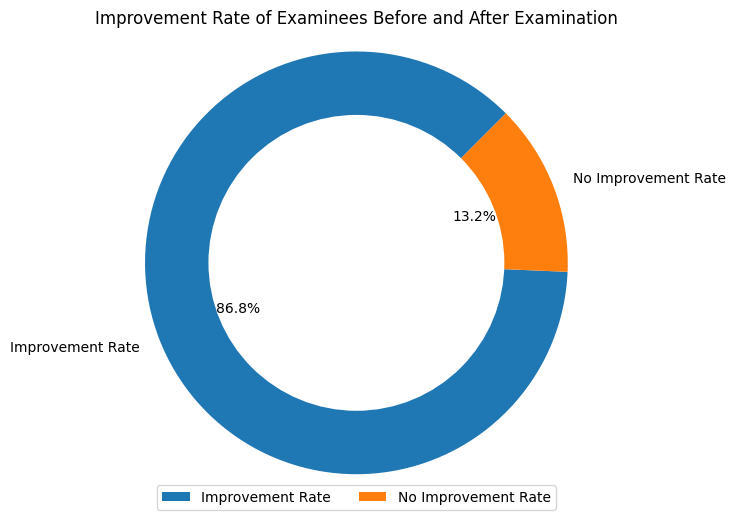

In [168]:
display_improvement([86.82, 13.18])

In [169]:
print("Average Improvement Score : ", df_test_failed['diff'].mean())

Average Improvement Score :  14.29149870801034


## From Failed to Passed

In [170]:
failed_to_passed = df_test[(df_test['Grade/100.00'] >= 60) & (df_test['pre_test_score'] <= 60)]
failed_to_passed

,name,Email address,pre_test_score,Grade/100.00,diff,improvement
375,កឹម តុលា,D220570@DSEERA22.com,20.52,62.52,42.0,True
820,កឹម សៀករតនៈ,dp23411@DSEPROVINCE23.com,39.63,72.72,33.09,True
205,កុយ ថារី,D220137@DSEERA22.com,38.46,60.35,21.89,True
586,កេត មេសា,D220368@DSEERA22.com,52.42,68.73,16.31,True
569,កែវ ច័ន្ទរ៉ានិច,D220369@DSEERA22.com,58.42,74.92,16.5,True
...,...,...,...,...,...,...
1310,អ៊ុក សាវន,dp233067@DSEPROVINCE23.com,50.33,77.12,26.79,True
781,អ៊ុន សាវន,D220351@DSEERA22.com,41.83,60.17,18.34,True
799,អ៊ុយ សុភ័ក្ដ្រ,D220365@DSEERA22.com,48.71,64.89,16.18,True
783,អ៊ុំ ពុទ្ធាវី,D220337@DSEERA22.com,43.06,66.53,23.47,True


In [171]:
failed_to_passed['diff'].mean()

25.281921182266018